In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline
#plt.style.use('ggplot')

In [2]:
def class_contour(X,X_train,Y_train,model):
    ''' function that returns arrays of the countour of the decision boundary of class 0 '''    
    xx, yy = np.meshgrid(np.linspace(-2, 2, 100),
                        np.linspace(-2, 2, 100))
    if model == 'naive':
        clf = GaussianNB()
        clf.fit(X_train,np.array(Y_train))
        Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
        Z = Z[:,1].reshape(xx.shape)
    elif model == 'dt':
        clf = DecisionTreeClassifier(random_state=0).fit(X_train,np.array(Y_train))
        Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
        Z = Z[:,1].reshape(xx.shape)
    return xx,yy,Z

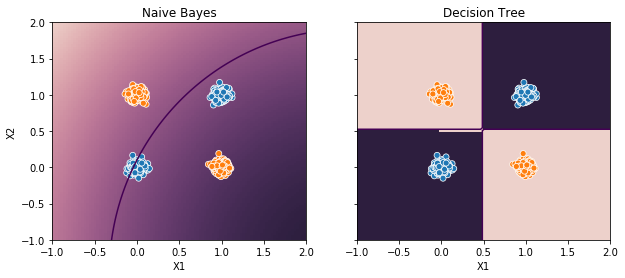

In [3]:
#Generate data where X1 and X2 have same distribution and Y = 1 when X1+X2==1
n=1000
np.random.seed(0)
X1 = np.random.binomial(size=n, n=1, p= 0.5)
X2 = np.random.binomial(size=n, n=1, p= 0.5)
Y = np.array(X1+X2==1,dtype=int)
X1 = np.add(X1,np.random.normal(0,.05,X1.shape[0]))
X2 = np.add(X2,np.random.normal(0,.05,X1.shape[0]))
X = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

trainX, testX = train_test_split(X, shuffle=False)
trainY, testY = train_test_split(Y, shuffle=False)

#Generate grid of data points to show prediction
x = y = np.linspace(-1,2,100)
df = pd.DataFrame(np.array(np.meshgrid(x,y)).T.reshape(-1,2))
df = df.rename(index=int, columns={0: "X1", 1: "X2"})

#NB
bnb = GaussianNB()
bnb.fit(trainX,trainY)
df["PredictionNB"]= bnb.predict_proba(df)[:,0]

#Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(trainX,trainY)
df["PredictionDT"]= dt.predict_proba(df.iloc[:,0:2])[:,0]

#Plotting
fig, ax = plt.subplots(1, 2,sharex='col', sharey='row')
#plt.suptitle("Classifying XOR Data", y=1,fontsize=20)
fig.set_size_inches(10, 4)
ax[0].set_ylim([-1,2])
ax[0].set_xlim([-1,2])
ax[1].set_ylim([-1,2])
ax[1].set_xlim([-1,2])

#Plot NB
ax[0].set_title("Naive Bayes")
sns.scatterplot(x=df["X1"],y=df["X2"], hue=df["PredictionNB"],s=20,linewidth=0,alpha=1,marker='s', ax=ax[0])
xx,yy,z = class_contour(df.iloc[:,:2].values,trainX,trainY,'naive')
ax[0].contour(xx,yy,z,[.5])

sns.scatterplot(x=X1,y=X2,hue=Y, ax=ax[0])
ax[0].legend().remove()

#Plot DT
ax[1].set_title("Decision Tree")
sns.scatterplot(x=df["X1"],y=df["X2"], hue=(df["PredictionDT"]-.5),s=20,linewidth=0,alpha=1,marker='s', ax=ax[1])
xx,yy,z = class_contour(df.iloc[:,:2].values,trainX,trainY,'dt')
ax[1].contour(xx,yy,z,[.5])

sns.scatterplot(x=X1,y=X2,hue=Y, ax=ax[1])
ax[1].legend().remove()
